# Machine Learning - Tarea 2
---

---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [1]:
import re
import nltk

import numpy as np
import pandas as pd
import seaborn as sns

from numpy import random as rnd
# from urllib import request as req
from matplotlib import pyplot as plt

from sklearn import preprocessing as skpp
from sklearn import decomposition as skdc
from sklearn import discriminant_analysis as skda
from sklearn import neighbors as skng
from sklearn import metrics as skmt
from sklearn import naive_bayes as sknb
from sklearn import svm as sksvm
from sklearn import model_selection as skms
from sklearn import linear_model as sklm
from sklearn.feature_extraction import text as sktx

from imblearn import over_sampling as imbos

from nltk import corpus as nlcp
from nltk.stem import porter as nlpt

---

---
## 1.- Reducción de Dimensionalidad para Clasificación

---
### 1.a

#### Datos

In [2]:
# train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
# test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
# train_data_f = req.urlretrieve(train_data_url, "train_data_1.csv")
# test_data_f = req.urlretrieve(test_data_url, "test_data_1.csv")
train_df_1 = pd.DataFrame.from_csv('train_data_1.csv',header=0,index_col=0)
test_df_1 = pd.DataFrame.from_csv('test_data_1.csv',header=0,index_col=0)

In [3]:
n_train = train_df_1.shape[0]
print("Cantidad de datos (train) :", n_train)
train_df_1.head()

Cantidad de datos (train) : 528


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [4]:
n_test = test_df_1.shape[0]
print("Cantidad de datos (test) :", n_test)
test_df_1.tail()

Cantidad de datos (test) : 462


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


El conjunto de entrenamiento tiene 528 datos y el conjunto de prueba tiene 462. Cada dato tiene 10 atributos.

In [5]:
for i in range(1, 12):
    n_class = train_df_1[train_df_1["y"]==i].shape[0]
    print("Promedio Clase {:<2}: {}".format(i, n_class/n_train))

Promedio Clase 1 : 0.09090909090909091
Promedio Clase 2 : 0.09090909090909091
Promedio Clase 3 : 0.09090909090909091
Promedio Clase 4 : 0.09090909090909091
Promedio Clase 5 : 0.09090909090909091
Promedio Clase 6 : 0.09090909090909091
Promedio Clase 7 : 0.09090909090909091
Promedio Clase 8 : 0.09090909090909091
Promedio Clase 9 : 0.09090909090909091
Promedio Clase 10: 0.09090909090909091
Promedio Clase 11: 0.09090909090909091


Todas las clases tienen la misma proporción $\left(\frac{1}{11}\right)$, por lo que los datos están equirepresentados.

---
### 1.b

#### Preprocesamiento

In [6]:
X_1 = train_df_1.loc[:,'x.1':'x.10'].values
y_1 = train_df_1.loc[:,'y'].values

sscaler = skpp.StandardScaler().fit(X_1)
X_1_std = sscaler.transform(X_1)

---
### 1.c

#### PCA (not even once)

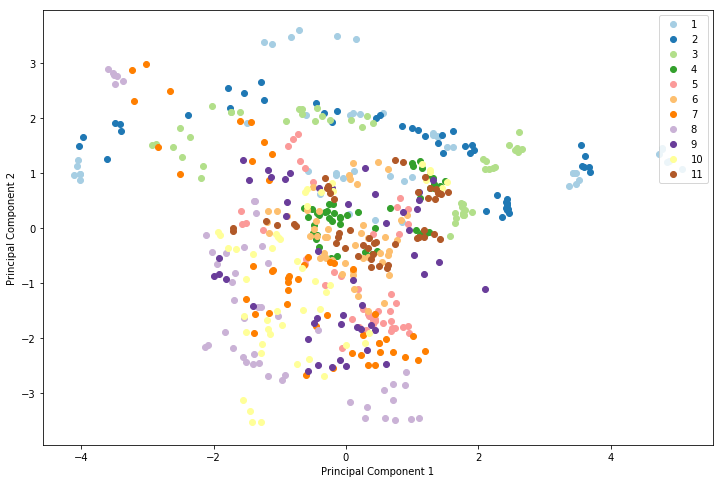

In [7]:
sklearn_pca = skdc.PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_1_std)

paired_cmap = plt.cm.get_cmap('Paired')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [paired_cmap(i) for i in np.linspace(0,1,11)]

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y_1==lab, 0],Xred_pca[y_1==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.d

#### LDA

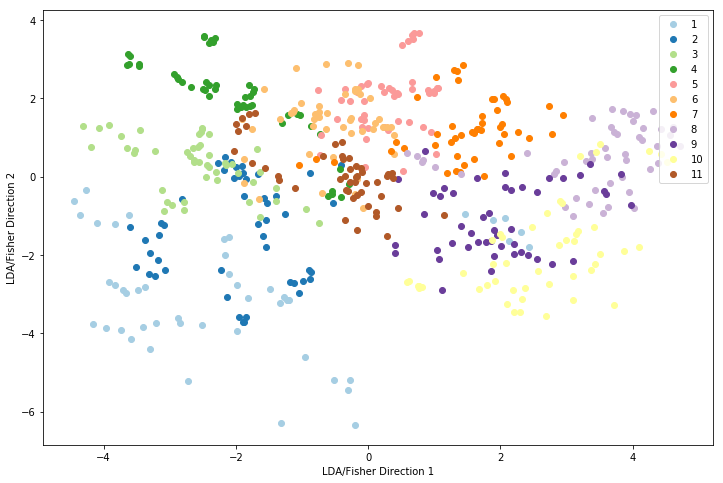

In [8]:
sklearn_lda = skda.LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_1_std,y_1)

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y_1==lab, 0],Xred_lda[y_1==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.e

#### Comparación Cualitativa

De los gráficos podemos ver que si particionaramos el espacio en distintas regiones correspondientes a las diferentes clases, con _LDA_ tendríamos menos elementos mal clasificados que con _PCA_, ya que la superposición de elementos de diferentes clases es mucho menor.

Aparte, graficando los centros de gravedad de cada cluster, podemos ver que tan separadas quedan las clases.

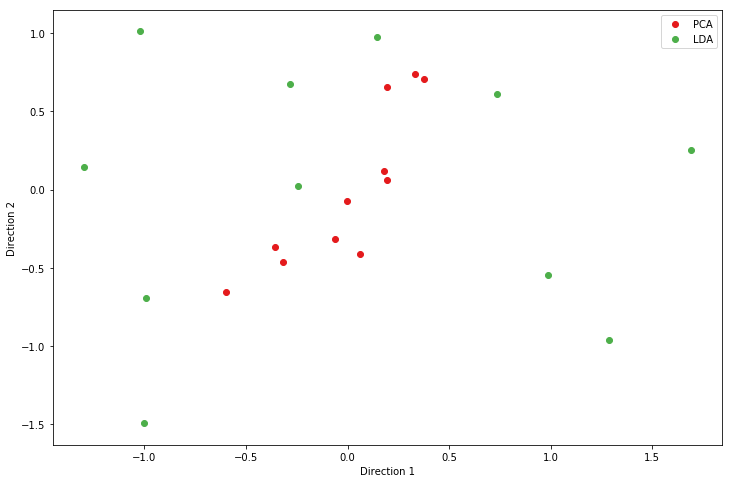

In [9]:
centers_pca = []
centers_lda = []

for lab in mclasses:
    centers_pca.append( np.sum(Xred_pca[y_1==lab], axis=0) /Xred_pca[y_1==lab].size )
    centers_lda.append( np.sum(Xred_lda[y_1==lab], axis=0) /Xred_lda[y_1==lab].size )
    
centers_pca = np.array(centers_pca)
centers_lda = np.array(centers_lda)

Set1_cmap = plt.cm.get_cmap('Set1')
green = Set1_cmap(0.25)
red = Set1_cmap(0)

plt.figure(figsize=(12, 8))
plt.scatter(centers_pca[:,0],centers_pca[:,1],label="PCA",c=red)
plt.scatter(centers_lda[:,0],centers_lda[:,1],label="LDA",c=green)
plt.xlabel('Direction 1')
plt.ylabel('Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Podemos ver que los centros de _PCA_ se encuentran en una región mucho más acotada que los de _LDA_, lo cual no es deseable ya que si están más separados hay menos superposición.

---
### 1.f

#### Clasificador Aleatorio

In [10]:
# X_1_std.shape[0]
def random_classifier(x):
    return rnd.randint(1, 12, size=x.shape[0])

print("Porcentaje de acierto : ", y_1[(random_classifier(X_1) - y_1) == 0].size / y_1.size * 100)
print("Valor referencial     : ", 100/11)

Porcentaje de acierto :  8.712121212121213
Valor referencial     :  9.090909090909092


Se espera que la tasa de aciertos sea aproximadamente $\frac{1}{11}$, ya que para cada uno de los datos, el clasificador tiene por construcción una probabilidad de $\frac{1}{11}$ de acertar la clase correcta a la que pertenece el dato.

---
### 1.g

#### LDA - QDA - Vecinos más Cercanos

LDA:
train score:  0.683712121212
test score :  0.443722943723

QDA:
train score:  0.988636363636
test score :  0.471861471861

KNN:
max train score: (k=1) 1.0
max test score : (k=7) 0.5194805194805194
test score k=7 : 0.9640151515151515


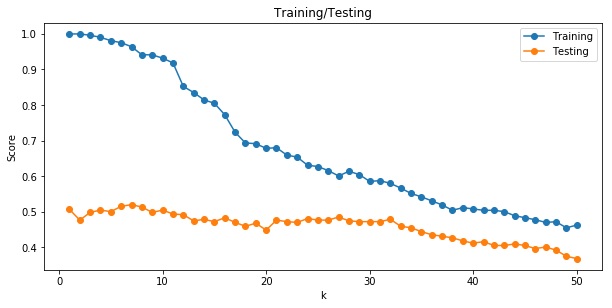

In [11]:
X_1_test = test_df_1.loc[:,'x.1':'x.10'].values
y_1_test = test_df_1.loc[:,'y'].values
X_1_std_test = sscaler.transform(X_1_test)

lda_model = skda.LinearDiscriminantAnalysis()
lda_model.fit(X_1_std,y_1)

print("LDA:")
print("train score: ", lda_model.score(X_1_std,y_1))
print("test score : ", lda_model.score(X_1_std_test,y_1_test))
print()

qda_model = skda.QuadraticDiscriminantAnalysis()
qda_model.fit(X_1_std,y_1)

print("QDA:")
print("train score: ", qda_model.score(X_1_std,y_1))
print("test score : ", qda_model.score(X_1_std_test,y_1_test))
print()

print("KNN:")
knn_scores_training = []
knn_scores_testing = []

k = range(1,51)
for c in k:
    knn_model = skng.KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_1_std,y_1)
    knn_scores_training.append(knn_model.score(X_1_std,y_1))
    knn_scores_testing.append(knn_model.score(X_1_std_test,y_1_test))


print("max train score: (k={}) {}".format(np.argmax(knn_scores_training)+1, max(knn_scores_training)))
print("max test score : (k={}) {}".format(np.argmax(knn_scores_testing)+1, max(knn_scores_testing)))
print("test score k=7 : {}".format(knn_scores_training[6]))
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

* Sobre el conjunto de entrenamiento se comporta mejor _QDA_, excepto cuando _KNN_ usa un $k$ muy bajo, sin embargo esto no es tan deseable ya que podría existir _underfitting_.
* Sobre el conjunto de prueba el mejor es _KNN_ con $k=6$.
* Para $k$ grandes, _KNN_ podemos ver que el error en el _Train Set_ se acerca al error del _Test Set_, sin embargo a partir de cierto punto ámbos comienzan a decaer. Esto se debe a que se comienzan a considerar vecinos no tan cercanos, que alteran el resultado. Debido al tamaño de la muestra, 50 vecinos es un porcentaje demasiado significativo de la muestra. 
* Para $k$ pequeños el error es muy pequeño en el _Train Set_ pero no así en el _Test Set_.

---
### 1.h

#### PCA Again

In [12]:
lda_scores_pca = np.zeros((2,10))
qda_scores_pca = np.zeros((2,10))
knn_scores_pca = np.zeros((3,10))

for dim in range(10):
    current_pca = skdc.PCA(n_components=dim+1).fit(X_1_std)
    Xc_train_pca = current_pca.transform(X_1_std)
    Xc_test_pca = current_pca.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_pca,y_1)
    lda_scores_pca[:,dim] = np.array([
        lda_model.score(Xc_train_pca, y_1),
        lda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_pca,y_1)
    qda_scores_pca[:,dim] = np.array([
        qda_model.score(Xc_train_pca, y_1),
        qda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,31)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_pca,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_pca,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_pca,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_pca[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 15.  13.   1.   1.  12.   6.   2.   1.   6.   7.]


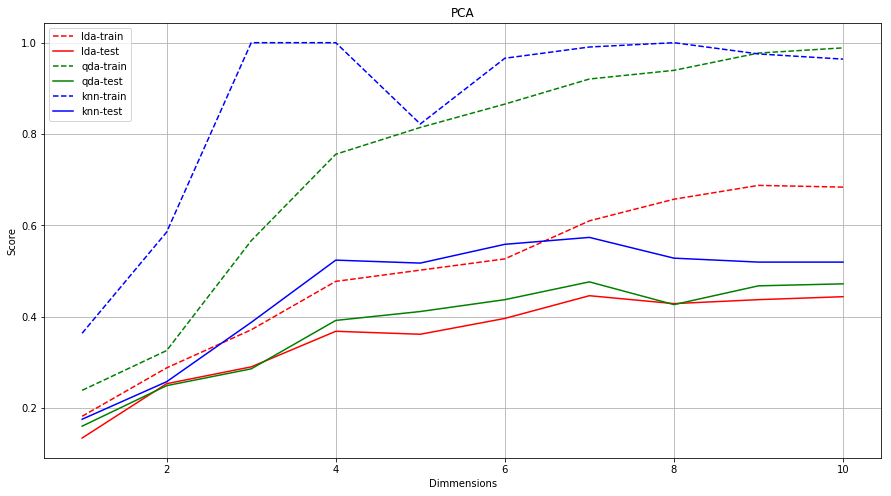

In [13]:
print("best k : ", knn_scores_pca[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_pca[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_pca[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_pca[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_pca[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_pca[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_pca[1,:], '-b', label="knn-test")
plt.title("PCA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

Podemos ver en el gráfico que el desempeño de _PCA_ es relativamente creciente sobre el _test set_ y el error sobre el _train set_ es bajo en knn y qda. Esto no es tan deseable ya que el mayor desempeño se alcanza estando cerca de la dimensionalidad completa.

---
### 1.i

#### LDA

In [14]:
lda_scores_lda = np.zeros((2,10))
qda_scores_lda = np.zeros((2,10))
knn_scores_lda = np.zeros((3,10))

for dim in range(10):
    current_lda = skda.LinearDiscriminantAnalysis(n_components=dim+1).fit(X_1_std, y_1)
    Xc_train_lda = current_lda.transform(X_1_std)
    Xc_test_lda = current_lda.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_lda,y_1)
    lda_scores_lda[:,dim] = np.array([
        lda_model.score(Xc_train_lda, y_1),
        lda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_lda,y_1)
    qda_scores_lda[:,dim] = np.array([
        qda_model.score(Xc_train_lda, y_1),
        qda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,101)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_lda,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_lda,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_lda,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_lda[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 40.  33.  73.  62.  44.  70.  69.  58.   1.   9.]


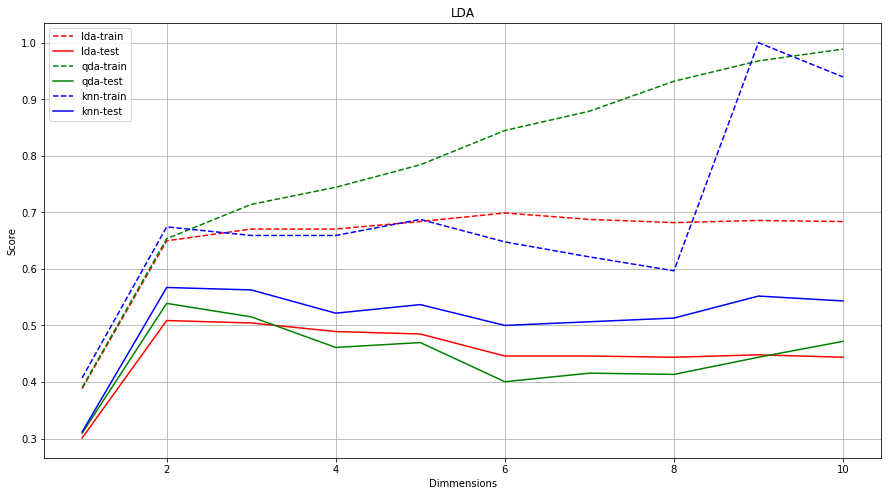

In [15]:
print("best k : ", knn_scores_lda[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_lda[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_lda[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_lda[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_lda[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_lda[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_lda[1,:], '-b', label="knn-test")
plt.title("LDA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

Podemos ver que el rendimiento de _LDA_ crece muy rápido al principio, lo que hace que tengamos buenos resultados en dimensiones bajas. Posteriormente se mantiene relativamente constante, disminuyendo incluso en la mayor parte de los casos. Esto significa que _LDA_ no solo es eficiente conservando la información relevante si no que también disminuyendo el ruido.

---

---
## 2.- Análisis de Opiniones sobre Películas

---
### 2.a

#### Datos

In [16]:
# train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
# test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

# train_data_f = req.urlretrieve(train_data_url, "train_data_2.csv")
# test_data_f = req.urlretrieve(test_data_url, "test_data_2.csv")

with open("train_data_2.csv", encoding='ISO-8859-1') as ftr:
    rows = [line.strip().split(" ",1) for line in ftr.readlines()]
    train_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    train_df_2['Sentiment'] = pd.to_numeric(train_df_2['Sentiment'])

with open("test_data_2.csv", encoding='ISO-8859-1') as fts:
    rows = [line.strip().split(" ",1) for line in fts.readlines()]
    test_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    test_df_2['Sentiment'] = pd.to_numeric(test_df_2['Sentiment'])

print(train_df_2.shape)
print(test_df_2.shape)

(3554, 2)
(3554, 2)


Podemos ver que tanto el _train set_ como el _test set_ tienen 3554 comentarios.

In [17]:
train_df_2.head()

,Sentiment,Text
0,-1,"everything's serious , poetic , earnest and --..."
1,-1,"narratively , trouble every day is a plodding ..."
2,1,a truly wonderful tale combined with stunning ...
3,1,jason patric and ray liotta make for one splen...
4,-1,haneke keeps us at arm's length . guided more ...


In [18]:
test_df_2.tail()

,Sentiment,Text
3549,1,a fascinating documentary about the long and e...
3550,1,the filmmakers' eye for detail and the high st...
3551,1,throwing caution to the wind with an invitatio...
3552,-1,"a big , baggy , sprawling carnival of a movie..."
3553,1,"an incendiary , deeply thought-provoking look ..."


---
### 2.b

#### Word extractor, Part I

In [19]:
def word_extractor0(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [word.lower() for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [20]:
print(word_extractor0("I love to eat cake"))
print(word_extractor0("I love eating cake"))
print(word_extractor0("I loved eating the cake"))
print(word_extractor0("I do not love eating cake"))
print(word_extractor0("I don't love eating cake"))
print()
print(word_extractor0("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor0("Iloveeatingcakeing!"))
print(word_extractor0("I love eating cakes"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake

loove eating caake
iloveeatingcakeing !
love eating cakes


In [21]:
def word_extractor(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [ps.stem(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [22]:
print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))
print()
print(word_extractor("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor("Iloveeatingcakeing!"))
print(word_extractor("I love eating cakes"))

love eat cake
love eat cake
love eat cake
not love eat cake
n't love eat cake

loov eat caak
iloveeatingcak !
love eat cake


Podemos ver que la función deja toda la oración en _lowercase_ para poder agrupar bien las palabras, elimina las palabras comunes (excepto not ya que influye en el _Sentiment_), también reduce los grupos de caracteres repetidos a un máximo de 2.

Además el agregar Stemming remueve las conjugaciones de las palabras, dejando solo la raíz para desligar la palabra de su contexto gramatical.

---
### 2.c

#### Word extractor, Part II

In [23]:
def word_extractor2(text):
    wordlemmatizer = nltk.WordNetLemmatizer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [wordlemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [24]:
print(word_extractor2("I love to eat cake"))
print(word_extractor2("I love eating cake"))
print(word_extractor2("I loved eating the cake"))
print(word_extractor2("I do not love eating cake"))
print(word_extractor2("I don't love eating cake"))
print()
print(word_extractor2("I loooooooooooooove eating caaaaaaaaaaaaake"))
print(word_extractor2("Iloveeatingcakeing!"))
print(word_extractor2("I love eating cakes"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake

loove eating caake
iloveeatingcakeing !
love eating cake


La diferencia apreciable es que lematizar deja las conjugaciones, ya que prefiere dejar en dos clases distintas palabras parecidas antes que clasificar erroneamente palabras diferentes, lo cual no es necesariamente deseable.

---
### 2.d

#### Representación vectorial de los datos

In [25]:
texts_train_lemmatizer = [word_extractor2(text) for text in train_df_2.Text]
texts_test_lemmatizer = [word_extractor2(text) for text in test_df_2.Text]

texts_train_stemming = [word_extractor(text) for text in train_df_2.Text]
texts_test_stemming = [word_extractor(text) for text in test_df_2.Text]

vectorizer_l = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_l.fit(np.asarray(texts_train_lemmatizer))

vectorizer_s = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_s.fit(np.asarray(texts_train_stemming))

features_train_l = vectorizer_l.transform(texts_train_lemmatizer)
features_test_l = vectorizer_l.transform(texts_test_lemmatizer)

features_train_s = vectorizer_s.transform(texts_train_stemming)
features_test_s = vectorizer_s.transform(texts_test_stemming)

labels_train = np.asarray((train_df_2.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df_2.Sentiment.astype(float)+1)/2.0)

vocab = vectorizer_l.get_feature_names()
dist = list(np.array(features_train_l.sum(axis=0)).reshape(-1,))

for tag, count in zip(vocab, dist):
    print(count, tag)

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

1 campion
1 campus
1 campy
2 canada
1 canadian
2 cancer
1 candidly
1 candle
3 candy
3 canned
2 cannes
1 canning
3 canny
1 canon
2 cantet
4 capable
1 capably
2 capacity
7 caper
1 capitalize
1 capricious
1 capsule
1 captain
1 captivates
2 captivating
1 captivatingly
2 captive
1 captor
15 capture
4 captured
2 capturing
1 capturou
6 car
3 card
1 cardboard
1 cardellini
1 cardoso
25 care
1 cared
1 careen
12 career
2 careful
2 carefully
1 caretaker
1 careworn
3 caricature
2 caring
1 carl
1 carlin
1 carmen
1 carnage
1 carnahan
2 carol
1 carpenter
2 carried
6 carry
2 carrying
1 carter
13 cartoon
3 cartoonish
4 caruso
1 carved
3 carvey
17 case
1 casey
1 cash
1 cashing
1 casi
1 casing
59 cast
1 caste
10 casting
1 castle
1 castrated
6 castro
3 casual
5 cat
1 catalog
1 catalytic
1 catapulting
9 catch
1 catching
1 catchy
3 category
2 catharsis
3 catholic
1 caton
1 cattaneo
1 caucasian
4 caught
2 cause
1 causing
1 caustic
6 cautionary
1 caved
1 caviezel
1 cavorting
1 cedar
1 celeb
1 celebrate
1 celeb

9 era
1 erase
1 erasing
1 erects
2 eric
1 erika
2 erotic
1 erotically
1 eroticism
1 errant
2 erratic
2 errol
2 error
1 erupt
1 escalating
2 escapade
5 escape
1 escaped
3 escapism
1 escort
1 esfera
1 esoteric
21 especially
1 espetáculo
1 espionage
1 espn
2 esque
1 essay
1 essayist
1 essential
6 essentially
1 establish
3 established
2 este
1 esteem
1 estela
1 esteticamente
1 esther
1 estridencias
2 estrogen
1 et
4 etc
2 ethan
3 ethic
1 ethical
3 ethnic
2 ethnicity
1 etoiles
1 etre
1 eugene
1 eun
1 euro
2 european
1 evade
1 evaded
1 evaluate
1 evans
1 evaporates
2 evelyn
143 even
1 evenhanded
2 evening
15 event
7 eventually
47 ever
1 everlasting
63 every
2 everybody
1 everyday
12 everyone
22 everything
1 everytime
2 evidence
1 evidenced
3 evil
4 evocative
5 evoke
3 evokes
1 evoking
1 evolution
1 evolve
1 evolved
1 evolves
1 ex
2 exact
1 exacting
16 exactly
4 exaggerated
1 exalts
8 examination
4 examine
1 examines
1 examining
6 example
2 exasperatingly
1 exceed
2 exceedingly
11 excellent
2

2 initial
2 initially
1 initiation
1 injected
2 injury
1 injustice
1 ink
1 inmate
7 inner
1 inning
4 innocence
1 innocuous
2 innovation
3 innovative
4 inoffensive
1 inquisitive
2 insane
1 insanely
1 insanity
1 inscrutable
2 insecure
1 insensitivity
7 inside
3 insider
14 insight
7 insightful
3 insightfully
2 insignificance
3 insipid
1 insisted
2 insistently
3 insomnia
1 inspection
1 inspiration
1 inspirational
5 inspire
10 inspired
2 inspires
8 inspiring
3 installment
1 instance
4 instantly
30 instead
4 instinct
1 instruct
1 instructive
1 insufferably
1 insufficiently
1 insult
3 insulting
1 insurance
1 intacto
2 integrated
1 integrates
1 integrating
2 integrity
3 intellect
9 intellectual
11 intelligence
23 intelligent
8 intended
1 intends
6 intense
2 intensely
3 intensity
2 intent
5 intention
2 intentionally
5 intentioned
2 inter
1 interacting
3 interaction
1 intercut
1 interesante
1 interesantes
19 interest
9 interested
35 interesting
2 interestingly
1 interfaith
2 interior
1 interlock

1 overcook
1 overdoses
1 overdue
1 overhearing
2 overheated
1 overindulgence
1 overinflated
2 overlong
7 overly
1 overplay
1 overpraised
1 override
1 overripe
1 oversexed
2 overshadowed
1 overshadows
1 oversize
1 oversized
2 overstated
1 overstays
1 overstimulated
2 overstuffed
1 overtime
1 overtly
1 overwhelm
1 overwhelmed
3 overwhelming
1 overwhelmingly
2 overwhelms
9 overwrought
1 owe
1 owes
1 own
2 owner
2 ozpetek
1 pabst
8 pace
9 paced
5 pacing
3 pacino
6 pack
2 package
10 packed
1 pact
2 padded
1 padding
1 padre
1 paean
1 page
1 pageant
1 pageantry
4 paid
4 pain
1 pained
9 painful
6 painfully
1 painkiller
1 painless
5 paint
1 painting
3 pair
1 pal
2 palestinian
3 palma
1 paltrow
1 pamela
2 pan
3 panache
1 pandemonium
1 pandering
1 panic
2 panoramic
3 pant
2 pantheon
1 pantomimesque
1 pap
1 papa
8 paper
1 papin
1 par
3 para
6 parable
2 parade
1 paradigm
1 paradiso
3 parallel
1 paramount
2 paranoia
10 parent
1 parental
1 paris
5 park
1 parka
5 parker
1 parking
1 parodied
5 parody
1

1 sickly
12 side
1 sidedness
1 sidey
1 siege
1 siegel
1 siempre
1 sieve
6 sight
7 sign
1 signal
4 significant
2 significantly
2 signpost
2 silberling
1 silberstein
1 silence
2 silent
3 silliness
21 silly
2 silver
4 similar
1 simon
2 simone
18 simple
1 simplest
5 simplicity
6 simplistic
25 simply
2 simpson
1 simulation
4 simultaneously
3 sin
1 sinai
32 since
7 sincere
2 sing
1 singer
3 singing
17 single
1 sings
1 singular
1 sinister
3 sink
1 sinner
1 siren
1 sirk
4 sister
2 sisterhood
12 sit
2 sitcom
1 sitcomishly
1 sits
7 sitting
17 situation
1 six
1 sixed
1 sixth
1 sixties
1 size
4 sized
2 sizzle
2 skate
1 skateboard
1 skateboarder
1 skating
1 skeleton
1 skeptic
4 sketch
1 sketchbook
1 sketched
2 sketchy
1 skewed
1 skewering
1 skid
1 skilfully
9 skill
1 skillful
1 skillfully
1 skim
1 skimpy
9 skin
1 skinner
3 skip
1 skit
1 skullduggery
1 skunk
2 sky
1 sl2
1 slack
1 slackers
1 slain
1 slam
1 slanted
3 slap
1 slapdash
1 slapping
7 slapstick
2 slash
5 slasher
1 slavishly
1 slc
1 sleaze
1

1 volume
1 voluptuous
1 vomit
1 von
1 vote
1 vowing
1 voyage
3 vu
6 vulgar
1 vulgarity
2 vulnerability
2 vulnerable
85 wa
1 wackiness
3 wacky
2 wade
1 wading
2 wafer
1 wahlberg
1 wailing
7 wait
4 waiting
2 wake
2 waking
1 wal
5 walk
3 walked
1 walker
3 walking
5 wall
3 wallace
1 walled
4 wallet
1 wallflower
3 wallop
1 wallow
1 wallowing
1 wally
1 walsh
1 walt
2 walter
1 waltz
2 wan
2 wander
1 wane
4 wannabe
31 want
5 wanted
2 wanting
27 war
1 ward
1 warden
2 warfare
1 warlord
9 warm
2 warmed
1 warmest
1 warming
9 warmth
2 warner
4 warning
2 warped
3 warrior
1 wartime
1 wary
1 washed
5 washington
1 washout
1 washy
9 waste
4 wasted
33 watch
4 watchable
1 watched
2 watchful
41 watching
13 water
1 waterboy
2 watt
1 wattage
5 wave
1 waver
115 way
2 waydowntown
2 wayne
2 we
7 weak
1 weaker
1 weapon
1 weaponry
8 wear
4 wearing
1 wearisome
2 weary
1 weathered
2 weave
3 weaver
1 weaving
1 web
1 webcast
1 weber
7 wedding
1 wednesday
7 week
1 weekend
1 weep
1 weeping
3 weepy
1 wei
1 weigel
2 weig

In [26]:
word_idx = np.argsort(dist)
word_idx = word_idx[::-1]
sorted_dist = np.array(dist)[word_idx]
sorted_vocab = np.array(vocab)[word_idx]

print("Train Set:")
for i in range(20):
    print("{:>2}.- {:>13} - occurrences: {}".format(i+1, sorted_vocab[i], sorted_dist[i]))

Train Set:
 1.-          film - occurrences: 567
 2.-         movie - occurrences: 481
 3.-           not - occurrences: 266
 4.-           one - occurrences: 246
 5.-          like - occurrences: 245
 6.-            ha - occurrences: 224
 7.-          make - occurrences: 183
 8.-         story - occurrences: 176
 9.-     character - occurrences: 163
10.-        comedy - occurrences: 145
11.-          even - occurrences: 143
12.-          time - occurrences: 143
13.-          good - occurrences: 141
14.-          much - occurrences: 128
15.-           doe - occurrences: 127
16.-           way - occurrences: 115
17.-   performance - occurrences: 114
18.-          well - occurrences: 113
19.-          work - occurrences: 113
20.-      director - occurrences: 108


In [27]:
dist2 = list(np.array(features_test_l.sum(axis=0)).reshape(-1,))

word_idx2 = np.argsort(dist2)
word_idx2 = word_idx2[::-1]
sorted_dist2 = np.array(dist2)[word_idx2]
sorted_vocab2 = np.array(vocab)[word_idx2]

print("Test Set:")
for i in range(20):
    print("{:>2}.- {:>13} - occurrences: {}".format(i+1, sorted_vocab2[i], sorted_dist2[i]))

Test Set:
 1.-          film - occurrences: 558
 2.-         movie - occurrences: 541
 3.-           not - occurrences: 278
 4.-           one - occurrences: 250
 5.-            ha - occurrences: 238
 6.-          like - occurrences: 230
 7.-         story - occurrences: 197
 8.-     character - occurrences: 175
 9.-          time - occurrences: 165
10.-          make - occurrences: 161
11.-        comedy - occurrences: 134
12.-          good - occurrences: 132
13.-           doe - occurrences: 132
14.-          even - occurrences: 129
15.-          much - occurrences: 124
16.-      director - occurrences: 113
17.-          well - occurrences: 105
18.-          work - occurrences: 104
19.-           way - occurrences: 102
20.-   performance - occurrences: 95


---
### 2.e

#### Evaluar el desempeño

In [28]:
def score_the_model(model, x, y, xt, yt, text):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt[:-1], yt[:-1])
    
    print("Train Accuracy {} : {}".format(text, acc_tr))
    print(" Test Accuracy {} : {}".format(text, acc_test), end='\n\n')
    print("Detailed Analysis Testing Results:")
    print(skmt.classification_report(yt, model.predict(xt), target_names=['+','-']))

##### precision - recall

* La presición corresponde a la relación entre los elementos bien clasificados de una clase y todos los elementos clasificados en esa clase.
* La exhaustividad (_recall_) corresponde a la relación entre los elementos bien clasificados, pero esta vez con el total de los elementos que realmente pertenecen a la clase.

Lo anterior se explica mejor en la siguiente imágen:

<img src="precision-recall.png" alt="imagen" style="width: 400px;"/>

##### $F_1$ y support

* El $F_1\text{-score}$ se calcula de la siguiente manera:
$$ F_1 = 2 \cdot \frac{1}{\frac{1}{\text{recall}} + \frac{1}{\text{precision}}} $$

Como podemos ver, este _score_ toma en cuenta tanto la exhaustividad como la presición, ya que si solo la presición es alta hay muchos elementos de la clase que no tomamos en cuenta, mientras que si solo la exhaustividad es alta estamos clasificando dentro de la clase muchos elementos que no pertenecen.

* El _support_ es el numero de ocurrencias de cada clase en $y$.

---
### 2.f

#### Naive Bayes

In [29]:
def do_NAIVE_BAYES(x, y, xt, yt):
    model = sknb.BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model, x, y, xt, yt, "BernoulliNB")
    return model

In [30]:
print("Naive Bayes Stemming:")
model = do_NAIVE_BAYES(features_train_s, labels_train, features_test_s, labels_test)
test_pred_s = model.predict_proba(features_test_s)
spl_s = rnd.randint(len(test_pred_s), size=15)

Naive Bayes Stemming:
Train Accuracy BernoulliNB : 0.9425998874507597
 Test Accuracy BernoulliNB : 0.7481001970166057

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.76      0.74      0.75      1803
          -       0.74      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554



In [31]:
print("Naive Bayes Lemmatizer:")
model = do_NAIVE_BAYES(features_train_l, labels_train, features_test_l, labels_test)
test_pred_l = model.predict_proba(features_test_l)
spl_l = rnd.randint(len(test_pred_l), size=15)

Naive Bayes Lemmatizer:
Train Accuracy BernoulliNB : 0.9589195272931907
 Test Accuracy BernoulliNB : 0.7379679144385026

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554



Stemming da ligeramente mejores resultados que Lemmatizer, ya que la implementación del segundo no modifica significativamente las palabras.

In [32]:
for s, (sentiment, text) in zip(labels_test[spl_s], zip(test_pred_s[spl_s], test_df_2.Text[spl_s])):
    print(
        "label: {} {}".format(s, '✔' if s == (sentiment[0] < 0.5) else '✘'),
        "p(y = 0): {:>.10}\np(y = 1): {:>.10}".format(*sentiment),
        text, end='\n\n', sep='\n'
    )

label: 1.0 ✔
p(y = 0): 0.4234626329
p(y = 1): 0.5765373671
if you sometimes like to go to the movies to have fun , wasabi is a good place to start .

label: 1.0 ✘
p(y = 0): 0.6510503286
p(y = 1): 0.3489496714
i liked this film a lot . . .

label: 0.0 ✔
p(y = 0): 0.9772690965
p(y = 1): 0.02273090353
the element of surprise might be the only thing femme fatale has going for it .

label: 0.0 ✔
p(y = 0): 0.7488485226
p(y = 1): 0.2511514774
just an average comedic dateflick but not a waste of time .

label: 0.0 ✘
p(y = 0): 0.07000719555
p(y = 1): 0.9299928045
although god is great addresses interesting matters of identity and heritage , it's hard to shake the feeling that it was intended to be a different kind of film .

label: 1.0 ✔
p(y = 0): 0.01131954574
p(y = 1): 0.9886804543
hardly an objective documentary , but it's great cinematic polemic . . . love moore or loathe him , you've got to admire . . . the intensity with which he's willing to express his convictions .

label: 0.0 ✔
p(y = 

In [33]:
for s, (sentiment, text) in zip(labels_test[spl_s], zip(test_pred_l[spl_l], test_df_2.Text[spl_l])):
    print(
        "label: {} {}".format(s, '✔' if s == (sentiment[0] < 0.5) else '✘'),
        "p(y = 0): {:>.10}\np(y = 1): {:>.10}".format(*sentiment),
        text, end='\n\n', sep='\n'
    )

label: 1.0 ✘
p(y = 0): 0.9697390004
p(y = 1): 0.03026099957
much of the cast is stiff or just plain bad .

label: 1.0 ✘
p(y = 0): 0.9862243357
p(y = 1): 0.01377566425
report card : doesn't live up to the exalted tagline - there's definite room for improvement . doesn't deserve a passing grade ( even on a curve ) .

label: 0.0 ✔
p(y = 0): 0.6308665962
p(y = 1): 0.3691334038
the script isn't very good ; not even someone as gifted as hoffman ( the actor ) can make it work .

label: 0.0 ✔
p(y = 0): 0.9762201851
p(y = 1): 0.02377981486
a smug and convoluted action-comedy that doesn't allow an earnest moment to pass without reminding audiences that it's only a movie .

label: 0.0 ✘
p(y = 0): 0.001135445822
p(y = 1): 0.9988645542
a delightful surprise because despite all the backstage drama , this is a movie that tells stories that work -- is charming , is moving , is funny and looks professional .

label: 1.0 ✔
p(y = 0): 0.2919693492
p(y = 1): 0.7080306508
this romantic/comedy asks the quest

---

In [34]:
def new_word_extractor(text):
    ps = nlpt.PorterStemmer()
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [ps.stem(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        words.append(word)
            
    return " ".join(words)

In [35]:
texts_train_no_stopwords = [new_word_extractor(text) for text in train_df_2.Text]
texts_test_no_stopwords = [new_word_extractor(text) for text in test_df_2.Text]

vectorizer_ns = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_ns.fit(np.asarray(texts_train_no_stopwords))

features_train_ns = vectorizer_ns.transform(texts_train_no_stopwords)
features_test_ns = vectorizer_ns.transform(texts_test_no_stopwords)

In [36]:
print("Naive Bayes Stemming no stopwords:")
model = do_NAIVE_BAYES(features_train_ns, labels_train, features_test_ns, labels_test)

Naive Bayes Stemming no stopwords:
Train Accuracy BernoulliNB : 0.9386606640405177
 Test Accuracy BernoulliNB : 0.7627357162960878

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.77      0.76      0.77      1803
          -       0.76      0.76      0.76      1751

avg / total       0.76      0.76      0.76      3554



En este caso particular, no sacar las _commonwords_ entrega mejores resultados.

---
### 2.g

#### SVM

In [37]:
def do_SVM(x, y, xt, yt):
    Cs = np.logspace(-5, 2, 8)
    
    for C in Cs:
        print("C = {}: ".format(C))
        model = sksvm.LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model, x, y, xt, yt, "SVM")
        print()

In [38]:
do_SVM(features_train_s, labels_train, features_test_s, labels_test)

C = 1e-05: 
Train Accuracy SVM : 0.7279122115925718
 Test Accuracy SVM : 0.6515620602307909

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.63      0.77      0.69      1803
          -       0.69      0.53      0.60      1751

avg / total       0.66      0.65      0.65      3554


C = 0.0001: 
Train Accuracy SVM : 0.7386043894203714
 Test Accuracy SVM : 0.6636645088657472

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.64      0.75      0.69      1803
          -       0.69      0.57      0.63      1751

avg / total       0.67      0.66      0.66      3554


C = 0.001: 
Train Accuracy SVM : 0.7760270118176702
 Test Accuracy SVM : 0.6873065015479877

Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.68      0.73      0.70      1803
          -       0.70      0.65      0.67      1751

avg / total       0.69

Podemos ver que _SVM_ no realiza un mejor trabajo que _Naive Bayes_ para los valores de _C_ probados.

Con respecto a los diferentes valores de _C_:
* Para valores muy altos podemos ver que el _Accuracy_ sobre el _Train Set_ es de 1, lo cual indica _overfitting_, comportamiento no deseable.
* Para valores muy bajos, el modelo se comporta como un _SVM_ estricto, en donde se le asigna mucha importancia a unos pocos puntos cercanos al hiperplano separador, lo que entrega un hiperplano sensible a los _outliers_ y que no necesariamente representa el comportamiento de la información de las clases.
* Además cabe destacar que _SVM_ estricto hace el supuesto de que la data es separable, lo cual casi nunca ocurre, por lo que en general el comportamiento no es el esperado.

---

---
## 3.- Fraude en Transacciones Bancarias

---
### 3.a

#### Cantidad de elementos por clase

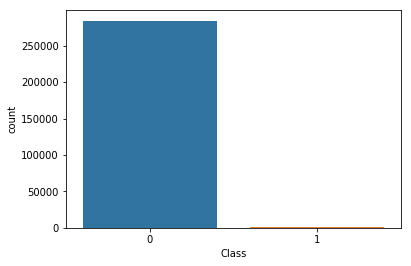

In [39]:
dt = pd.read_csv("creditcard.csv", header=0)
sns.countplot("Class", data=dt)
plt.show()

Claramente esto indica que las clases están desbalanceadas, a menos que...

<img src="momo_piñera.png" alt="imagen" style="width: 800px;"/>

---
### 3.b

#### Estandarización

In [40]:
dt["nAmount"] = skpp.StandardScaler().fit_transform(dt["Amount"].values.reshape(-1,1))
dt.drop(["Time", "Amount"], axis=1, inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Como los 28 primeros atributos provienen de una análisis _PCA_, ya se encuentran estandarizados. Es por esto que solo estandarizamos el monto, el cual es entregado aparte.

---
### 3.c

#### Modelo y Matriz de Confusión

In [125]:
def model(model, features_train, features_test, labels_train, labels_test):
    clf = model
    if type(labels_train) != np.ndarray:
        labels_train = labels_train.values.ravel()
    if type(labels_test) != np.ndarray:
        labels_test = labels_test.values.ravel()
    
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    
    cnf_matrix = skmt.confusion_matrix(labels_test, pred)
    recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])
    print("The recall for this model is:", recall)
    
    fig = plt.figure(figsize=(14,5))
    print("TP:", cnf_matrix[1,1])
    print("TN:", cnf_matrix[0,0])
    print("FP:", cnf_matrix[0,1])
    print("FN:", cnf_matrix[1,0])
    
    plt.subplot(121)
    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confussion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    
    plt.subplot(122)
    fpr, tpr, _ = skmt.roc_curve(labels_test, pred, pos_label=1)
    plt.plot(fpr, tpr, label="roc curve (area = {:.3})".format(skmt.auc(fpr, tpr)))
    plt.grid()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    
    plt.show()
    
    print()
    print("Classification Report:")
    print(skmt.classification_report(labels_test, pred))

##### Preguntas:

* Una matriz de confusión es una representación visual del desempeño del clasificador, contabiliza los aciertos y errores de predicción con respecto a la data real (se divide en 4 secciones, _True Positives_, _False Positives_, _False Negatives_ y _True Negatives_).


* Entre las métricas comunes que se pueden calcular a partir de esta matriz se encuentran:
    * Exhaustividad o Sensibilidad (_recall_): $ \quad \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $
    * Precisión (_presition_): $ \quad \text{PPV} = \frac{\text{TP}}{\text{TN} + \text{FN}} $
* se pueden calcular muchos más pero la mayoría son distintas combinaciones de la información obtenida en la matriz de confusión, en general, una de las cantidades dividida en la suma de su fila o columna, cada una con una semántica diferente. De todos estos indicadores creemos que el más importante para este caso de estudio es el _Fall-out_ o _False Positive Rate_, pues representa la proporción de **fraudes no identificados** como tales, que creemos es la situación más crítica.
    * _Fall-out_ : $ \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $


* Entre otros indicadores que no siguen esta estructura encontramos:
    * Exactitud (_accuracy_): $ \quad \text{ACC} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $
    * $F_1$-score : $ \quad F_1 = \frac{2\text{TP}}{2\text{TP} + \text{FP} + \text{FN}} $


* La curva _ROC_ grafica el _True Positive Rate_ y el _False Positive Rate_ de un clasificador binario en función del parámetro de corte de la función de decisión de dicho clasificador. El desempeño del modelo es mejor mientras mayor sea el área bajo esta curva.
* Para cada punto de la curva tenemos un modelo diferente, y las coordenadas de ese punto nos entrega las relaciones de la matriz de confusión. En particular, las coordenadas del punto en la curva que corresponden al parámetro elegido por el modelo, coinciden con las relaciones en la matriz de confusión que se obtendrá.

---
### 3.d

#### Preparación de los datos

In [42]:
def data_preparation(x):
    x_features = x.iloc[:,x.columns != "Class"]
    x_labels = x.iloc[:,x.columns == "Class"]
    x_train, x_test, y_train, y_test = skms.train_test_split(x_features, x_labels, test_size=0.3)
    
    print("Length of training data: {}".format(len(x_train)))
    print("Length of test data: {}".format(len(x_test)))
    return(x_train,x_test,y_train,y_test)

Esta función, en `train_test_split` saca un _Validation Set_ que contiene un 30% de los datos elegidos aleatoriamente, mientras que el nuevo _Train Set_ contiene un 70% de los datos del original.

In [118]:
def data_preparation_oversampling(x, y):
    x_train, x_test, y_train, y_test = skms.train_test_split(x, y, test_size=0.3)
    
    print("Length of training data: {}".format(len(x_train)))
    print("Length of test data: {}".format(len(x_test)))
    return(x_train,x_test,y_train,y_test)

---
### 3.e

#### Undersample

In [43]:
def undersample(data,times):
    fraud_indices = np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    
    Normal_indices_undersample = np.array(
        np.random.choice(
            normal_indices,
            (times*Count_Fraud_transacation),
            replace=False
        )
    )
    
    undersample_data = np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    normal = len(undersample_data[undersample_data.Class==0]) / len(undersample_data["Class"])
    print("The normal transacation proportion is : {}".format(normal))
    
    fraud = len(undersample_data[undersample_data.Class==1]) / len(undersample_data["Class"])
    print("The fraud transacation proportion is : {}".format(fraud))
    
    return(undersample_data)

Suponiendo que los datos provienen de la misma distribución y son independientes, podemos extraer una muestra aleatoria mucho más pequeña, pero que a la vez sea representativa de los casos no fraudulentos, de tal manera que al juntarlos con los casos fraudulentos, ambas cantidades sean comparables.

---
### 3.f

#### Logistic Regression y Undersample

In [110]:
x_tr, x_ts, y_tr, y_ts = data_preparation(dt)
real_x_tr = np.array(x_tr)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

Length of training data: 199364
Length of test data: 85443


In [119]:
def analize_proportion(method, i, x_tr, x_ts, y_tr, y_ts, under=True):
    print("The undersample data for {} proportion".format(i), end='\n\n')
    if under:
        Undersample_data = undersample(x_tr,i)
    print()
    print("----------------------Validation Set------------------------", end='\n\n')
    print("The model classification for {} proportion".format(i), end='\n\n')

    if under:
        under_x, under_xt, under_yx, under_yxt = data_preparation(Undersample_data)
    else:
        under_x, under_xt, under_yx, under_yxt = data_preparation_oversampling(x_tr, y_tr)
    
    clf = method
    model(clf, under_x, under_xt, under_yx, under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf, under_x, x_ts, under_yx, y_ts)
    print("---------------------------------------------------------------")

The undersample data for 1 proportion

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 487
Length of test data: 209
The recall for this model is: 0.928571428571
TP: 104
TN: 91
FP: 6
FN: 8


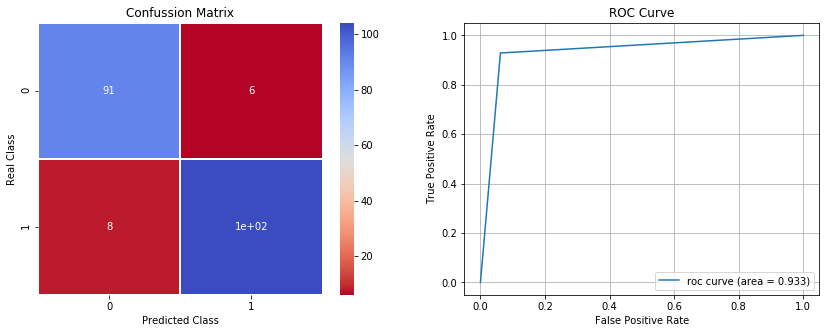


Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.94      0.93        97
          1       0.95      0.93      0.94       112

avg / total       0.93      0.93      0.93       209

--------------------------Testing Set---------------------------
The recall for this model is: 0.895833333333
TP: 129
TN: 82009
FP: 3290
FN: 15


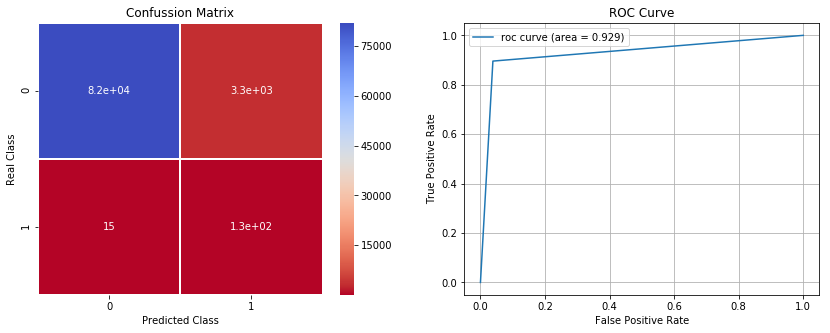


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85299
          1       0.04      0.90      0.07       144

avg / total       1.00      0.96      0.98     85443

---------------------------------------------------------------


In [96]:
analize_proportion(sklm.LogisticRegression(), 1, x_tr, x_ts, y_tr, y_ts)

The undersample data for 2 proportion

The normal transacation proportion is : 0.6666666666666666
The fraud transacation proportion is : 0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 730
Length of test data: 314
The recall for this model is: 0.945454545455
TP: 104
TN: 202
FP: 2
FN: 6


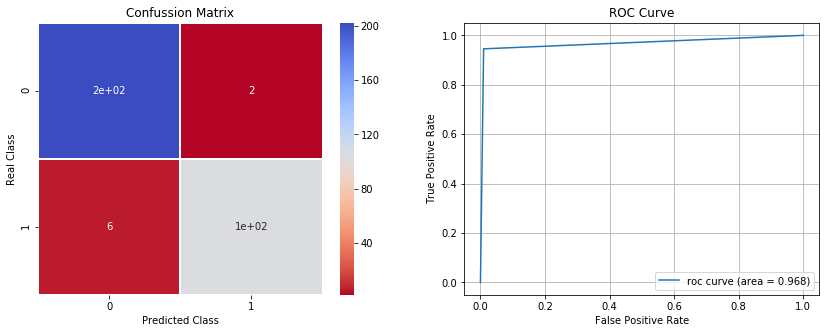


Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       204
          1       0.98      0.95      0.96       110

avg / total       0.97      0.97      0.97       314

--------------------------Testing Set---------------------------
The recall for this model is: 0.875
TP: 126
TN: 83689
FP: 1610
FN: 18


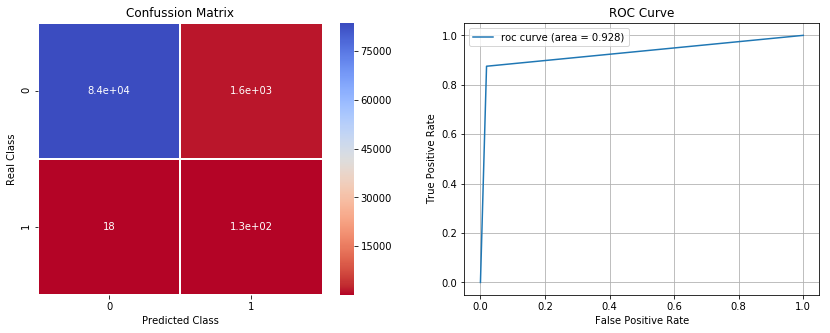


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85299
          1       0.07      0.88      0.13       144

avg / total       1.00      0.98      0.99     85443

---------------------------------------------------------------


In [58]:
analize_proportion(sklm.LogisticRegression(), 2, x_tr, x_ts, y_tr, y_ts)

The undersample data for 3 proportion

The normal transacation proportion is : 0.75
The fraud transacation proportion is : 0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 974
Length of test data: 418
The recall for this model is: 0.905660377358
TP: 96
TN: 309
FP: 3
FN: 10


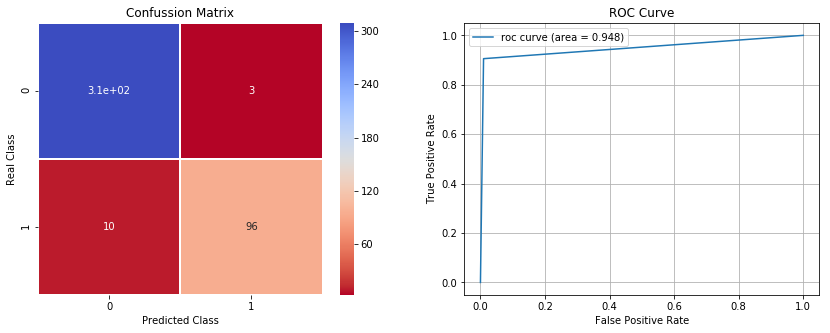


Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       312
          1       0.97      0.91      0.94       106

avg / total       0.97      0.97      0.97       418

--------------------------Testing Set---------------------------
The recall for this model is: 0.868055555556
TP: 125
TN: 84579
FP: 720
FN: 19


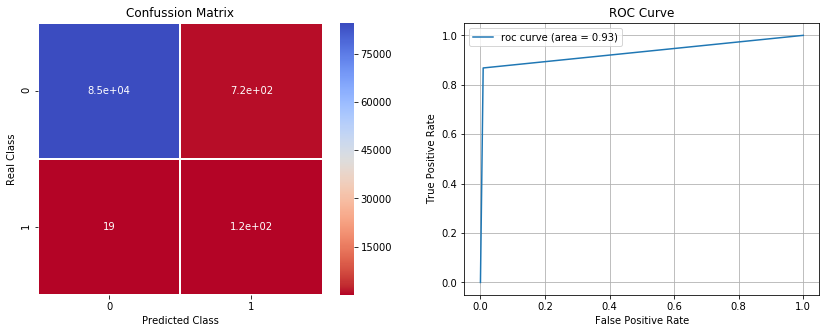


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85299
          1       0.15      0.87      0.25       144

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [59]:
analize_proportion(sklm.LogisticRegression(), 3, x_tr, x_ts, y_tr, y_ts)

The undersample data for 4 proportion

The normal transacation proportion is : 0.8
The fraud transacation proportion is : 0.2

----------------------Validation Set------------------------

The model classification for 4 proportion

Length of training data: 1218
Length of test data: 522
The recall for this model is: 0.921348314607
TP: 82
TN: 431
FP: 2
FN: 7


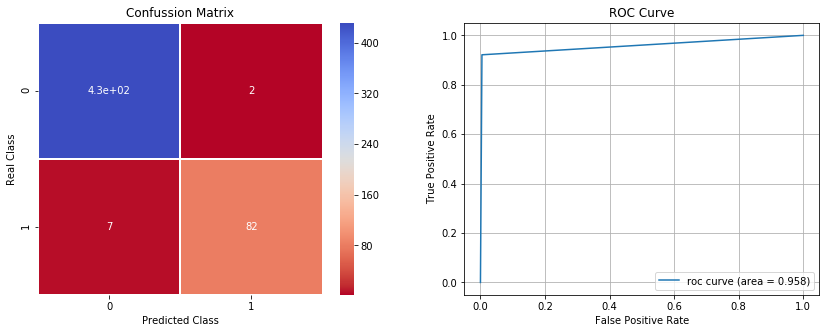


Classification Report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       433
          1       0.98      0.92      0.95        89

avg / total       0.98      0.98      0.98       522

--------------------------Testing Set---------------------------
The recall for this model is: 0.847222222222
TP: 122
TN: 84736
FP: 563
FN: 22


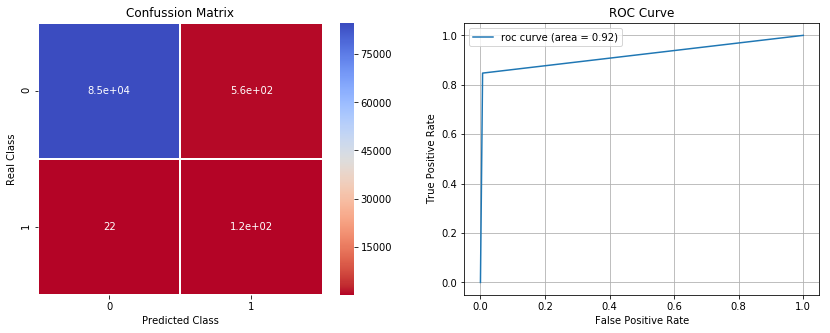


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85299
          1       0.18      0.85      0.29       144

avg / total       1.00      0.99      1.00     85443

---------------------------------------------------------------


In [60]:
analize_proportion(sklm.LogisticRegression(), 4, x_tr, x_ts, y_tr, y_ts)

---

##### KNN:

The undersample data for 1 proportion

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 487
Length of test data: 209
The recall for this model is: 0.81981981982
TP: 91
TN: 98
FP: 0
FN: 20


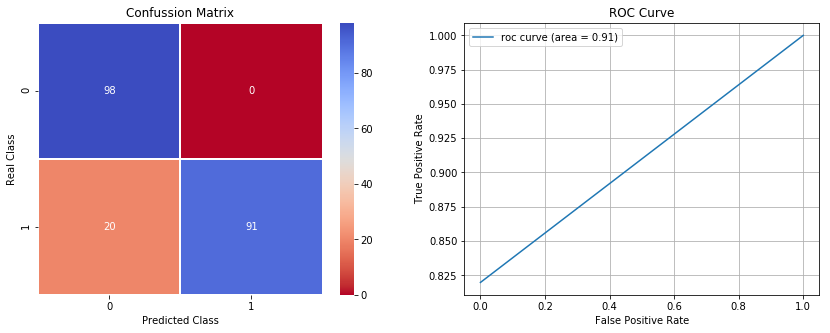


Classification Report:
             precision    recall  f1-score   support

          0       0.83      1.00      0.91        98
          1       1.00      0.82      0.90       111

avg / total       0.92      0.90      0.90       209

--------------------------Testing Set---------------------------
The recall for this model is: 0.791666666667
TP: 114
TN: 84559
FP: 740
FN: 30


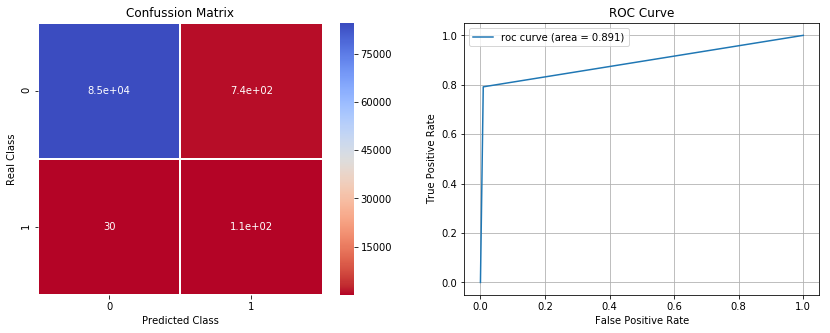


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85299
          1       0.13      0.79      0.23       144

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [69]:
analize_proportion(sknb.BernoulliNB(), 1, x_tr, x_ts, y_tr, y_ts)

The undersample data for 2 proportion

The normal transacation proportion is : 0.6666666666666666
The fraud transacation proportion is : 0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 730
Length of test data: 314
The recall for this model is: 0.82
TP: 82
TN: 212
FP: 2
FN: 18


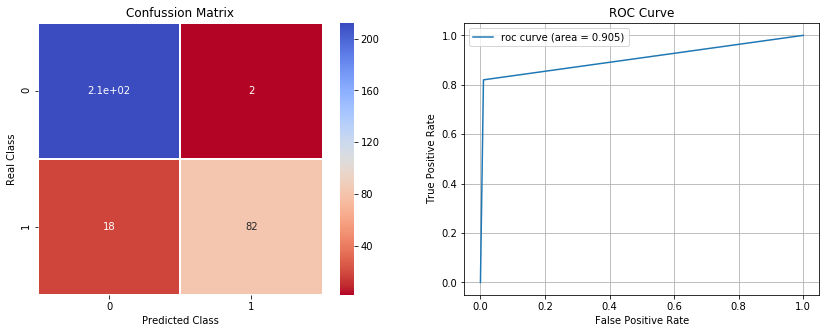


Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.99      0.95       214
          1       0.98      0.82      0.89       100

avg / total       0.94      0.94      0.93       314

--------------------------Testing Set---------------------------
The recall for this model is: 0.798611111111
TP: 115
TN: 84814
FP: 485
FN: 29


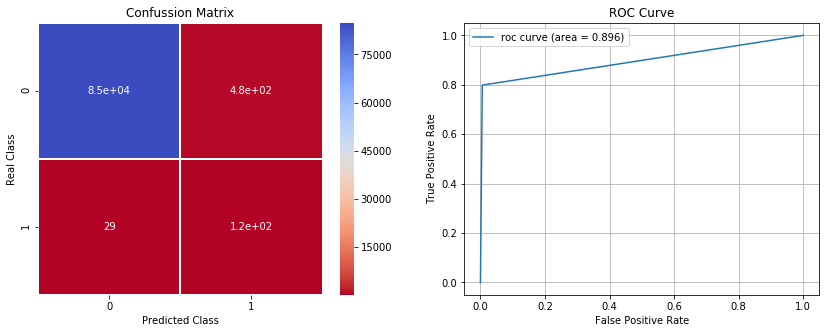


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85299
          1       0.19      0.80      0.31       144

avg / total       1.00      0.99      1.00     85443

---------------------------------------------------------------


In [70]:
analize_proportion(sknb.BernoulliNB(), 2, x_tr, x_ts, y_tr, y_ts)

The undersample data for 3 proportion

The normal transacation proportion is : 0.75
The fraud transacation proportion is : 0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 966
Length of test data: 414
The recall for this model is: 0.809090909091
TP: 89
TN: 303
FP: 1
FN: 21


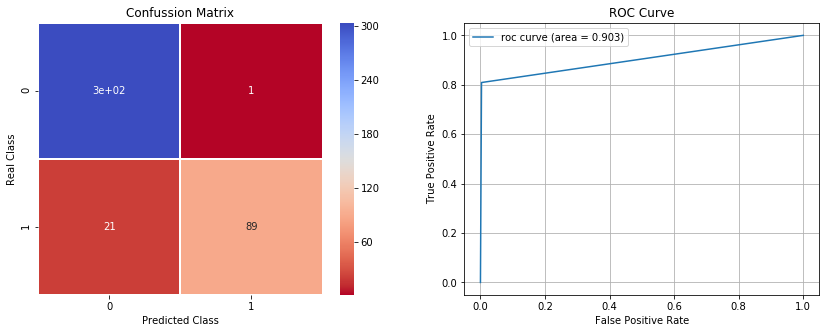


Classification Report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.96       304
          1       0.99      0.81      0.89       110

avg / total       0.95      0.95      0.95       414

--------------------------Testing Set---------------------------
The recall for this model is: 0.823129251701
TP: 121
TN: 84921
FP: 375
FN: 26


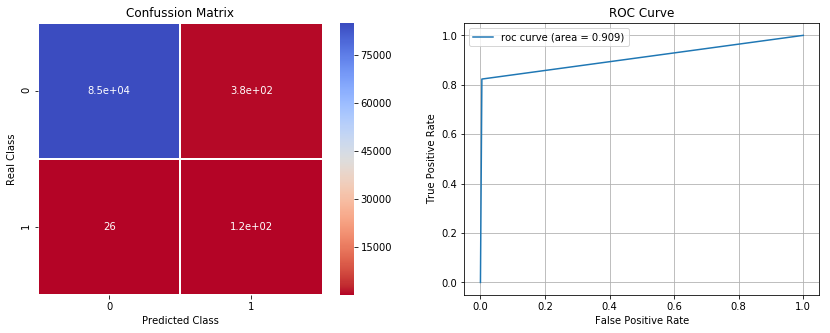


Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.24      0.82      0.38       147

avg / total       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [128]:
analize_proportion(sknb.BernoulliNB(), 3, x_tr, x_ts, y_tr, y_ts)

The undersample data for 4 proportion

The normal transacation proportion is : 0.8
The fraud transacation proportion is : 0.2

----------------------Validation Set------------------------

The model classification for 4 proportion

Length of training data: 1218
Length of test data: 522
The recall for this model is: 0.806722689076
TP: 96
TN: 401
FP: 2
FN: 23


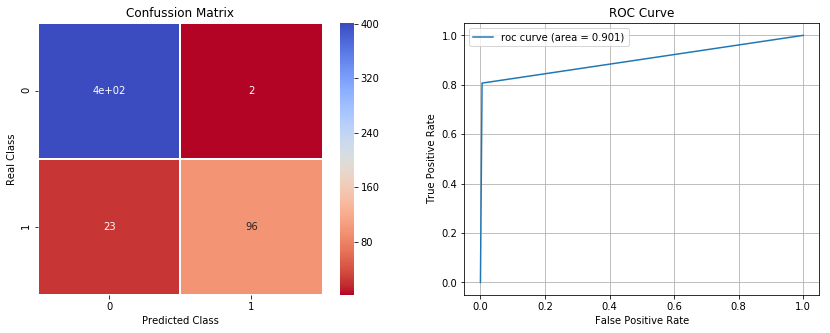


Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       403
          1       0.98      0.81      0.88       119

avg / total       0.95      0.95      0.95       522

--------------------------Testing Set---------------------------
The recall for this model is: 0.777777777778
TP: 112
TN: 85035
FP: 264
FN: 32


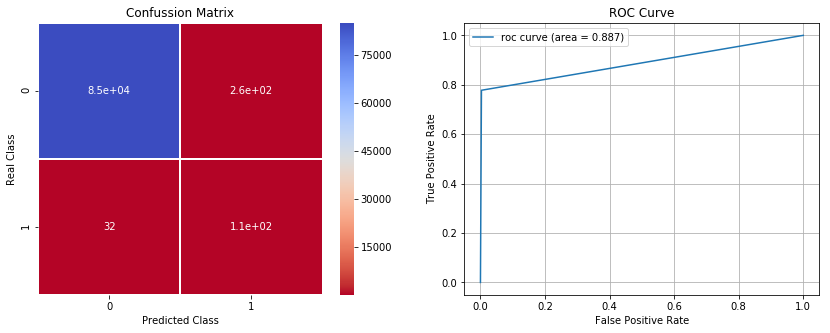


Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.30      0.78      0.43       144

avg / total       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [72]:
analize_proportion(sknb.BernoulliNB(), 4, x_tr, x_ts, y_tr, y_ts)

##### Sumario

wip

---
### 3.g

#### Oversampling y SMOTE

In [112]:
os = imbos.SMOTE(random_state=0, n_jobs=4)
os_data_X, os_data_y = os.fit_sample(real_x_tr,np.array(y_tr).flatten())

In [113]:
print("   Fraudes : {}".format(np.sum(os_data_y == 1)))
print("No Fraudes : {}".format(np.sum(os_data_y == 0)))

   Fraudes : 199019
No Fraudes : 199019


In [117]:
os_data_X.shape

(398038, 29)

The undersample data for 1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 278626
Length of test data: 119412
The recall for this model is: 0.907529478857
TP: 54106
TN: 58292
FP: 1501
FN: 5513


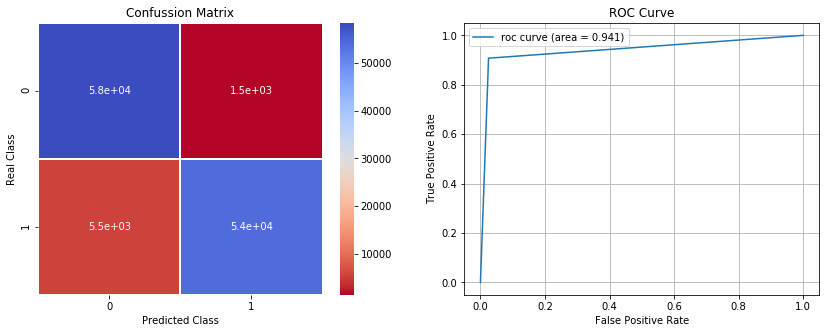


Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.97      0.94     59793
          1       0.97      0.91      0.94     59619

avg / total       0.94      0.94      0.94    119412

--------------------------Testing Set---------------------------
The recall for this model is: 0.925170068027
TP: 136
TN: 83210
FP: 2086
FN: 11


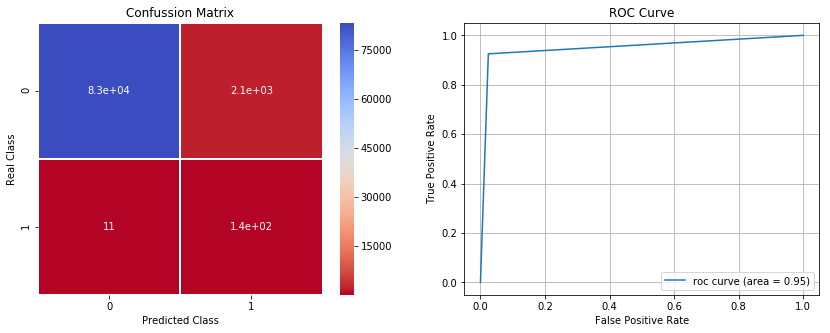


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85296
          1       0.06      0.93      0.11       147

avg / total       1.00      0.98      0.99     85443

---------------------------------------------------------------


In [127]:
analize_proportion(sklm.LogisticRegression(), 1, os_data_X, x_ts, os_data_y, y_ts, under=False)

The undersample data for 1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 278626
Length of test data: 119412
The recall for this model is: 0.813534061223
TP: 48581
TN: 59282
FP: 414
FN: 11135


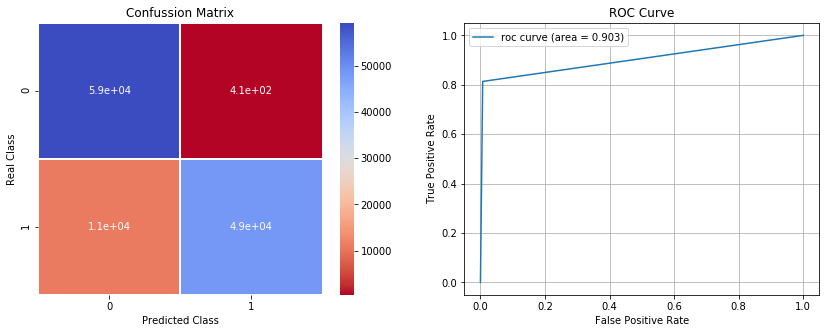


Classification Report:
             precision    recall  f1-score   support

          0       0.84      0.99      0.91     59696
          1       0.99      0.81      0.89     59716

avg / total       0.92      0.90      0.90    119412

--------------------------Testing Set---------------------------
The recall for this model is: 0.823129251701
TP: 121
TN: 84694
FP: 602
FN: 26


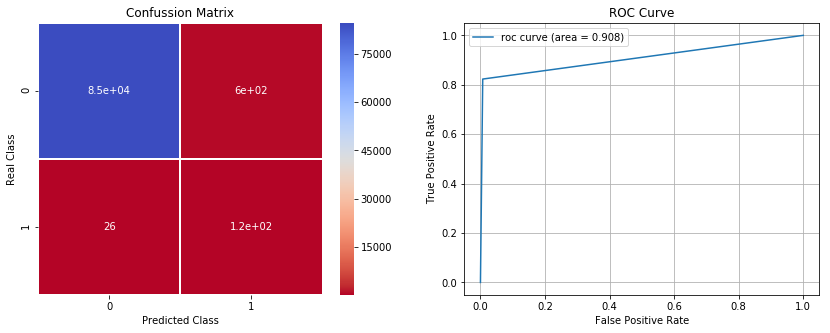


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85296
          1       0.17      0.82      0.28       147

avg / total       1.00      0.99      1.00     85443

---------------------------------------------------------------


In [129]:
analize_proportion(sknb.BernoulliNB(), 1, os_data_X, x_ts, os_data_y, y_ts, under=False)

---

---

---